## XOR 이해하기 with Keras

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.4.0'

In [3]:
# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

XOR : 모두 같으면 0

In [4]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [0,
          1,
          1,
          0]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

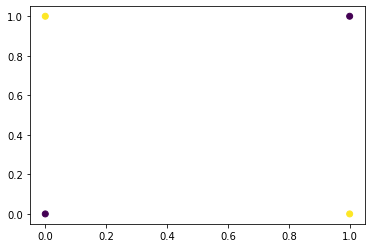

In [5]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import models

* Dense() : 기본적인 레이어, 입력과 출력 사이에 있는 모든 뉴런 연결 (가중치와 편향 구성)
* Sequential() : Sequential 신경망 (각각의 layer는 순차적으로 배치됨)

In [7]:
model = models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Activation('tanh'))
#model.add(layers.Dense(2)) # comment out
#model.add(layers.Activation('tanh')) # comment out
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

* model.add(layers.Dense(2, input_dim=2)) >>> 첫 번째 레이어, 뉴런 2개, 은닉층

    => model.add(layers.Activation('tanh')) >>> activation function은 tanh 사용


* model.add(layers.Dense(1)) >>> 두 번째 레이어, 뉴런 1개, output층

    => model.add(layers.Activation('sigmoid')) >>> activation function은 sigmoid 사용

* SGD = Stochastic Gradient Descent <br>
확률적 경사 하강법, 샘플 하나하나 들어올떄마다 weight와 bias를 조정하면서 epoch 돌림 <br>
기존의 경사 하강법은 데이터셋의 크기가 너무 커지면 계산이 오래 걸리는 단점이 있음 <br>
sgd는 반복당 하나의 데이터(batch=1)만을 사용하여 적은 계산으로 기울기를 얻어내는 방식

In [8]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [9]:
model.summary() # summary() 메소드로 형성된 신경망의 구조를 봄

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


* param : parameter number <br>
조정될 수 있는 파라미터가 몇 개 있는지?
<img src='../images/param.png' width=400px />

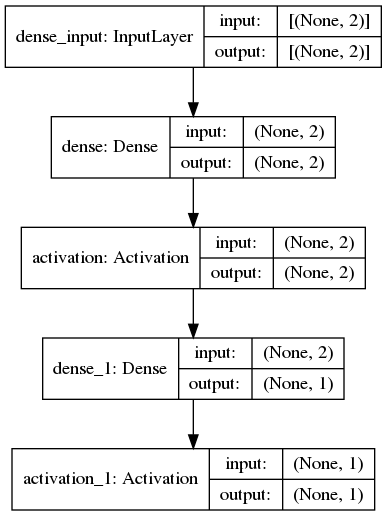

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_xor.png', show_shapes=True)

In [11]:
history = model.fit(x_data, y_data,  batch_size=1, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 729us/step - loss: 0.7424 - accuracy: 0.5333
Epoch 2/500
4/4 [==============================] - 0s 512us/step - loss: 0.6122 - accuracy: 0.6333
Epoch 3/500
4/4 [==============================] - 0s 601us/step - loss: 0.6899 - accuracy: 0.7333
Epoch 4/500
4/4 [==============================] - 0s 453us/step - loss: 0.7204 - accuracy: 0.5333
Epoch 5/500
4/4 [==============================] - 0s 502us/step - loss: 0.6745 - accuracy: 0.7333
Epoch 6/500
4/4 [==============================] - 0s 445us/step - loss: 0.6442 - accuracy: 0.8333
Epoch 7/500
4/4 [==============================] - 0s 391us/step - loss: 0.6222 - accuracy: 0.8333
Epoch 8/500
4/4 [==============================] - 0s 393us/step - loss: 0.6114 - accuracy: 0.8333
Epoch 9/500
4/4 [==============================] - 0s 379us/step - loss: 0.6510 - accuracy: 0.7333
Epoch 10/500
4/4 [==============================] - 0s 398us/step - loss: 0.5929 - accuracy: 0.9000
Epoch 11/

4/4 [==============================] - 0s 386us/step - loss: 0.4145 - accuracy: 0.9000
Epoch 84/500
4/4 [==============================] - 0s 398us/step - loss: 0.5425 - accuracy: 0.7333
Epoch 85/500
4/4 [==============================] - 0s 394us/step - loss: 0.6052 - accuracy: 0.5333
Epoch 86/500
4/4 [==============================] - 0s 407us/step - loss: 0.6102 - accuracy: 0.5333
Epoch 87/500
4/4 [==============================] - 0s 387us/step - loss: 0.3550 - accuracy: 0.9000
Epoch 88/500
4/4 [==============================] - 0s 399us/step - loss: 0.6136 - accuracy: 0.5333
Epoch 89/500
4/4 [==============================] - 0s 411us/step - loss: 0.5106 - accuracy: 0.7333
Epoch 90/500
4/4 [==============================] - 0s 407us/step - loss: 0.3918 - accuracy: 0.8333
Epoch 91/500
4/4 [==============================] - 0s 418us/step - loss: 0.3732 - accuracy: 0.9000
Epoch 92/500
4/4 [==============================] - 0s 393us/step - loss: 0.5042 - accuracy: 0.7333
Epoch 93/500


4/4 [==============================] - 0s 388us/step - loss: 0.0708 - accuracy: 1.0000
Epoch 246/500
4/4 [==============================] - 0s 381us/step - loss: 0.0750 - accuracy: 1.0000
Epoch 247/500
4/4 [==============================] - 0s 382us/step - loss: 0.0744 - accuracy: 1.0000
Epoch 248/500
4/4 [==============================] - 0s 384us/step - loss: 0.0792 - accuracy: 1.0000
Epoch 249/500
4/4 [==============================] - 0s 382us/step - loss: 0.0787 - accuracy: 1.0000
Epoch 250/500
4/4 [==============================] - 0s 386us/step - loss: 0.0825 - accuracy: 1.0000
Epoch 251/500
4/4 [==============================] - 0s 382us/step - loss: 0.0693 - accuracy: 1.0000
Epoch 252/500
4/4 [==============================] - 0s 386us/step - loss: 0.0681 - accuracy: 1.0000
Epoch 253/500
4/4 [==============================] - 0s 380us/step - loss: 0.0593 - accuracy: 1.0000
Epoch 254/500
4/4 [==============================] - 0s 384us/step - loss: 0.0706 - accuracy: 1.0000
Epoc

4/4 [==============================] - 0s 382us/step - loss: 0.0270 - accuracy: 1.0000
Epoch 408/500
4/4 [==============================] - 0s 393us/step - loss: 0.0341 - accuracy: 1.0000
Epoch 409/500
4/4 [==============================] - 0s 392us/step - loss: 0.0280 - accuracy: 1.0000
Epoch 410/500
4/4 [==============================] - 0s 416us/step - loss: 0.0342 - accuracy: 1.0000
Epoch 411/500
4/4 [==============================] - 0s 394us/step - loss: 0.0297 - accuracy: 1.0000
Epoch 412/500
4/4 [==============================] - 0s 386us/step - loss: 0.0306 - accuracy: 1.0000
Epoch 413/500
4/4 [==============================] - 0s 398us/step - loss: 0.0325 - accuracy: 1.0000
Epoch 414/500
4/4 [==============================] - 0s 389us/step - loss: 0.0274 - accuracy: 1.0000
Epoch 415/500
4/4 [==============================] - 0s 394us/step - loss: 0.0332 - accuracy: 1.0000
Epoch 416/500
4/4 [==============================] - 0s 395us/step - loss: 0.0335 - accuracy: 1.0000
Epoc

## 학습 결과 그려보기

Text(0.5, 0, 'epoch')

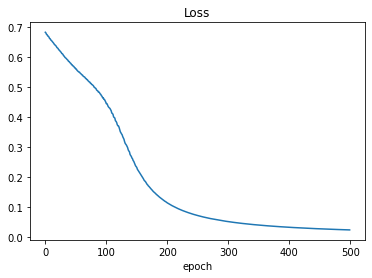

In [12]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

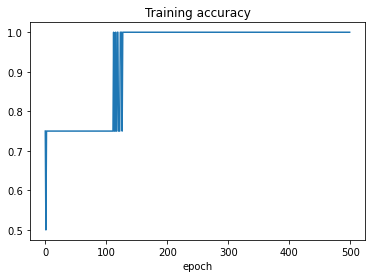

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('epoch')

### 확률 찍어보기

In [14]:
hypothesis = model.predict(x_data)
print(hypothesis)

[[0.02740705]
 [0.98393685]
 [0.983906  ]
 [0.03071955]]


In [15]:
predicted = hypothesis > 0.5
print(predicted)

[[False]
 [ True]
 [ True]
 [False]]


### 생각해보기
* XOR 분류에서 정확도 75의 의미는?

<img src='../images/xor_graph.png' width=300px />

* 선형(직선)으로 표현 했을 때, 3/4만 맞춤(75%)
* 단순하게 짜르는 방법으로는 최대 75% 밖에 맞추지 못함
* Dense layer, 즉 hidden layer를 통해 복합적인 방법을 통해 100%로 맞추는 방법을 찾음
* 이를 극복한 방법에 SGD를 사용(기울기만을 보는 것이 아니고 확률적, 복합적으로 봄)